In [8]:
# 데이터 세트 로딩
from sklearn.datasets import load_iris
iris = load_iris()

data = iris.data
feature_names = iris.feature_names

target = iris.target
target_names = iris.target_names

import pandas as pd

iris_df = pd.DataFrame(
    data=data,
    columns=feature_names
)

iris_df['target'] = target
iris_df.shape

(150, 5)

## EDA를 위한 시각화

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 꽃잎과 꽃받침을 따로 시각화
sepal_cols = [feature_names[0], feature_names[1]]
petal_cols = [feature_names[2], feature_names[3]]

sepal_cols, petal_cols

(['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)'])

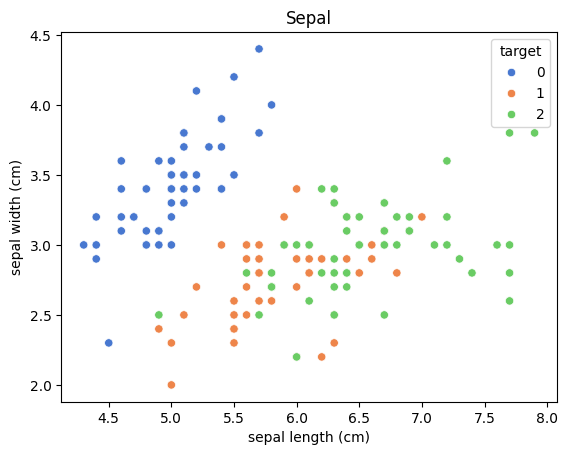

In [4]:
# 꽃받침 시각화
sns.scatterplot(
    x=sepal_cols[0],
    y=sepal_cols[1],
    hue='target',
    palette='muted',
    data=iris_df
)
plt.title('Sepal')
plt.show()

* 1, 2 클래스를 구별하지 못하는 경우가 있을 것이다

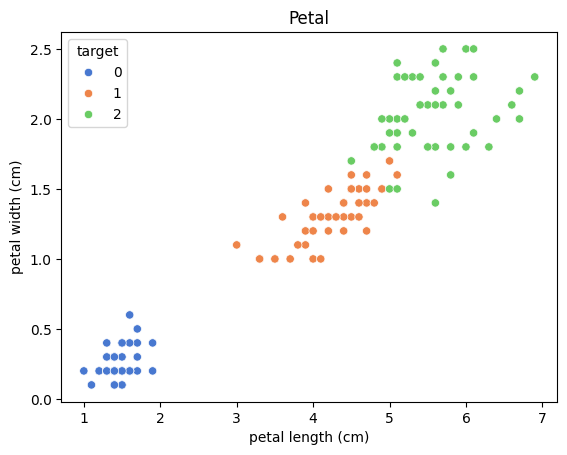

In [5]:
# 꽃잎 시각화
sns.scatterplot(
    x=petal_cols[0],
    y=petal_cols[1],
    hue='target',
    palette='muted',
    data=iris_df
)
plt.title('Petal')
plt.show()

## PCA를 이용한 차원 변환
* 4차원 데이터를 한 눈에 볼 수 없음 => 2차원으로 각각 쪼개서 시각화
* 4가지 정보를 2가지로 함축해서 시각화

In [9]:
from sklearn.decomposition import PCA

# n_components : 축소할 차원, 주성분 갯수 = 분산이 가장 큰 벡터의 갯수
pca_2 = PCA(n_components=2)

# 비지도 학습에서는 target 이 주어지지 않는다
pca_2.fit(iris_df.drop('target', axis=1)) # fit 의 의미: 입력 데이터에 대한 공분산 행렬, 고유벡터, 고윳값을 구한다

# 데이터 변환 수행 (데이터를 변환시키기 때문에 transformer 에 해당)
iris_pca = pca_2.transform(iris_df.drop('target', axis=1))

iris_pca.shape # 두 개의 컴포넌트 생성

(150, 2)

In [11]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_cols = ['Component 1', 'Component 2']

iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_cols
)

iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


* component 값의 의미는 우리가 알 수 없다

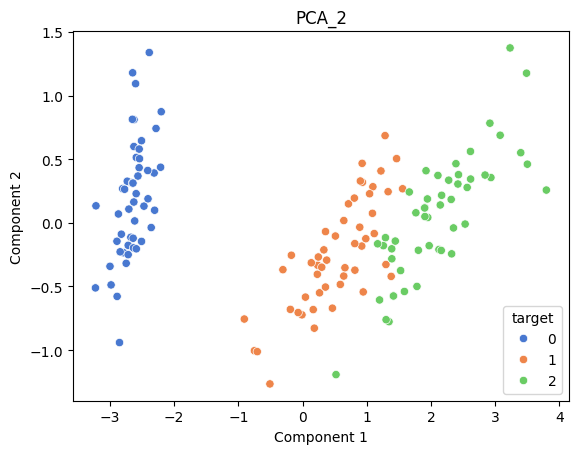

In [15]:
sns.scatterplot(
    x='Component 1',
    y='Component 2',
    hue='target',
    palette='muted',
    data=iris_pca_df
)

plt.title('PCA_2')
plt.show()

* 4차원 데이터가 2차원으로 함축

In [16]:
# 4 차원에서 3 차원으로 차원축소 해보기
pca_3 = PCA(n_components=3)

iris_pca_3 = pca_3.fit_transform(iris_df.drop("target", axis=1))
iris_pca_3.shape

(150, 3)

In [17]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2", "Component 3"]
iris_pca_df = pd.DataFrame(
    iris_pca_3,
    columns=pca_columns
)
iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


C:\Users\user\AppData\Local\Temp\ipykernel_8852\3386637930.py:14: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
C:\Users\user\AppData\Local\Temp\ipykernel_8852\3386637930.py:16: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([]) # y축 tick 사용하지 않기
C:\Users\user\AppData\Local\Temp\ipykernel_8852\3386637930.py:18: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([]) # z축 tick 사용하지 않기


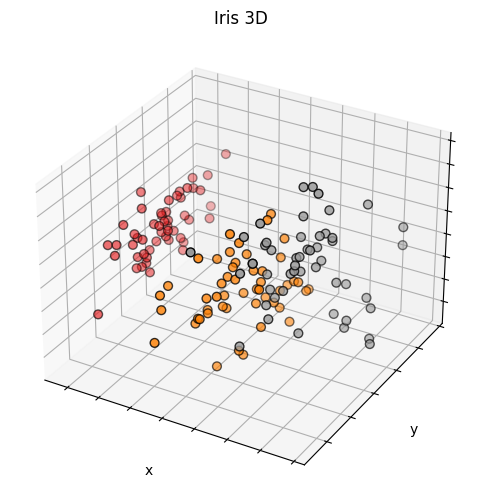

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_df["Component 1"], # x축 데이터
           iris_pca_df["Component 2"], # y축 데이터
           iris_pca_df["Component 3"], # z축 데이터
           c=iris_pca_df['target'], # 3d scatter의 색깔 기준
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([]) # y축 tick 사용하지 않기
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([]) # z축 tick 사용하지 않기

plt.show()

## PCA 를 활용한 모델링

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [20]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_cols = ['Component 1', 'Component 2']

iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_cols
)

iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [21]:
rcf = RandomForestClassifier(random_state=156)

pca_X = iris_pca_df[['Component 1', 'Component 2']]
scores_pca = cross_val_score(
    rcf,
    pca_X,
    iris_pca_df['target'],
    scoring='accuracy',
    cv=3
)

print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.94 0.96 0.98]
PCA 변환 데이터 평균 정확도: 0.96


* 4차원을 그대로 사용하나, 2차원으로 압축하나 성능이 비슷하게 나온다.